In [1]:
import numpy as np
import matplotlib.pyplot as plt

import structs as S # import custom library
from structs import Struct # import Struct object from the castom libraty

In [2]:
def plot_profile(profile, ls='-'):
    l = len(profile)
    colors = plt.cm.jet(np.linspace(0,1,l))[::-1]
     
    for i in range(l):
        struct = profile[i]
        x, y = struct.get_plot_coord()
        plt.plot(x, y, c=colors[i], ls=ls)

# profile 1

In [3]:
Profile1 = [Struct('LIN', 50, 40, 50, -37), 
            Struct('ARC', 50, -37, 82, -58, 22.89, True),
            Struct('LIN', 82, -58, 101, -46),
            Struct('LIN', 101, -46, 130, -46),
            Struct('LIN', 130, -46, 130, -25),
            Struct('ARC', 130, -25,148, -7, 18, False),
            Struct('LIN', 148, -7, 168, -7),
            Struct('ARC', 168, -7, 183, 8, 15, True),
            Struct('LIN', 183, 8, 183, 28),
            Struct('LIN', 183, 28, 153, 48),
            Struct('LIN', 153, 48, 58, 48),
            Struct('ARC', 58, 48, 50, 40, 8, True)]

In [4]:
print(Profile1[0])
print(Profile1[1])

line with coordinates (50, 40)->(50, -37)
arc with coordinates (50, -37)->(82, -58)


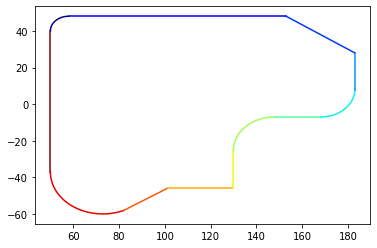

In [5]:
plot_profile(Profile1)

In [6]:
def get_simple_offset(profile, offset):
    profile_off = []
    O_start = S.find_bisection_point(profile[-1], profile[0], offset)
    O1 = O_start
    for i, sruct in enumerate(profile):
        if i!=len(profile)-1:
            O2 = S.find_bisection_point(profile[i], profile[i+1], offset)
        else:
            O2 = O_start
        if profile[i].struct_type=='LIN':
            profile_off.append(Struct('LIN', O1[0], O1[1], O2[0], O2[1]))
        elif profile[i].struct_type=='ARC':
            if profile[i].inside:
                profile_off.append(Struct('ARC', O1[0], O1[1], O2[0], O2[1], profile[i].r+offset, profile[i].inside))
            else:
                profile_off.append(Struct('ARC', O1[0], O1[1], O2[0], O2[1], profile[i].r-offset, profile[i].inside))
        O1 = O2
    return profile_off

In [7]:
Profile1_off5 = get_simple_offset(Profile1, offset=-5)
Profile1_off10 = get_simple_offset(Profile1, offset=10)

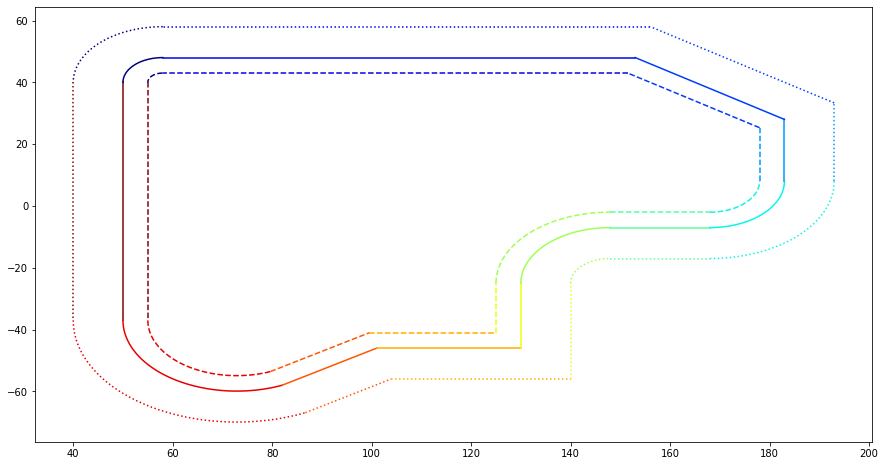

In [8]:
plt.figure(figsize=(15,8)) 
plot_profile(Profile1)
plot_profile(Profile1_off5, '--')
plot_profile(Profile1_off10, 'dotted')

# comparison Profile1

### Yours: offset = -5
##### line(True, 0, 'INT', [55,40], [0,0], False, 0, 0, 0, False, True, False),
##### line(True, 1, 'LIN', [0,0], [55,-37], False, 0, 0, 0, False, False, False),
##### line(True, 2, 'ARC', [0,0], [79.676,-53.553], False, 17.89, 0, 0, True, False,False),
##### line(True, 3, 'LIN', [0,0], [99.553,-41], False, 0, 0, 0, False, False,False),
##### line(True, 4, 'LIN', [0,0], [125,-41], False, 0, 0, 0, False, False, False),
##### line(True, 5, 'LIN', [0,0], [125,-25], False, 0, 0, 0, False, False, False),
##### line(True, 6, 'ARC', [0,0], [148,-2], False, 23, 0, 0, False, False, False),
##### line(True, 7, 'LIN', [0,0], [168,-2], False, 0, 0, 0, False, False, False),
##### line(True, 8, 'ARC', [0,0], [178,8], False, 10, 0, 0, True, False, False),
##### line(True, 9, 'LIN', [0,0], [178,25.324], False, 0, 0, 0, False, False,False),
##### line(True, 10, 'LIN', [0,0], [151.486,43], False, 0, 0, 0, False, False,False),
##### line(True, 11, 'LIN', [0,0], [58,43], False, 0, 0, 0, False, False, False),
##### line(True, 12, 'ARC', [0,0], [55,40], False, 3, 0, 0, True, False, False),

In [9]:
print('Mine: offset = -5')
for line in Profile1_off5:
    print(line)

Mine: offset = -5
line with coordinates (55.0, 40.0)->(55.0, -37.000104020437504)
arc with coordinates (55.0, -37.000104020437504)->(79.65617405757621, -53.56657294936128)
line with coordinates (79.65617405757621, -53.56657294936128)->(99.55324789406491, -41.0)
line with coordinates (99.55324789406491, -41.0)->(125.0, -41.0)
line with coordinates (125.0, -41.0)->(125.0, -25.0)
arc with coordinates (125.0, -25.0)->(148.0, -2.0)
line with coordinates (148.0, -2.0)->(168.0, -2.0)
arc with coordinates (168.0, -2.0)->(178.0, 8.0)
line with coordinates (178.0, 8.0)->(178.0, 25.32408120756002)
line with coordinates (178.0, 25.32408120756002)->(151.48612181134, 43.0)
line with coordinates (151.48612181134, 43.0)->(58.0, 43.0)
arc with coordinates (58.0, 43.0)->(55.0, 40.0)


# profile 2

In [10]:
Profile2 = [Struct('LIN', 17, 122, 17, 65),
            Struct('ARC', 17, 65, 47, 35, 30, True),
            Struct('LIN', 47, 35, 68.803, 35),
            Struct('ARC', 68.803, 35, 97.748,57.117, 30, True),
            Struct('ARC', 97.748,57.117, 120.919, 83.925, 41, False),
            Struct('LIN', 120.919, 83.925, 177.725, 83.925),
            Struct('ARC', 177.725, 83.925, 220.181,61.774, 51.763, False),
            Struct('LIN', 220.181, 61.774, 229.789, 48),
            Struct('LIN', 229.789, 48, 245 ,48),
            Struct('ARC', 245,48, 255, 58, 10, True),
            Struct('LIN', 255, 58, 255, 90),
            Struct('LIN', 255, 90, 142, 90),
            Struct('LIN', 142, 90, 142, 98),
            Struct('ARC', 142, 98, 118, 122, 24, True),
            Struct('LIN', 118, 122, 17,122)]

In [11]:
Profile2_off2 = get_simple_offset(Profile2, offset=-2)
Profile2_off5 = get_simple_offset(Profile2, offset=5)

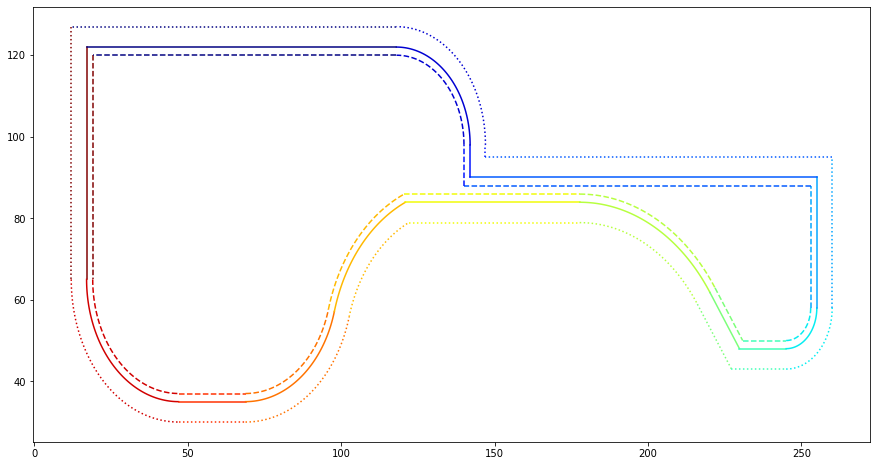

In [12]:
plt.figure(figsize=(15,8)) 
plot_profile(Profile2)
plot_profile(Profile2_off2, '--')
plot_profile(Profile2_off5, 'dotted')

# comparison Profile2

### Yours: offset = -2
##### line(True, 0, 'INT', [19,120], [0,0], False, 0, 0, 0, False, True, False),
##### line(True, 1, 'LIN', [0,0], [19,65], False, 0, 0, 0, False, False, False),
##### line(True, 2, 'ARC', [0,0], [47,37], False, 28, 0, 0, True, False, False),
##### line(True, 3, 'LIN', [0,0], [68.803,37], False, 0, 0, 0, False, False, False),
##### line(True, 4, 'ARC', [0,0], [95.819,57.642], False, 28, 0, 0, True, False, False),
##### line(True, 5, 'ARC', [0,0], [120.507,85.925], False, 43, 0, 0, False, False, False),
##### line(True, 6, 'LIN', [0,0], [177.725,85.925], False, 0, 0, 0, False, False, False),
##### line(True, 7, 'ARC', [0,0], [221.822,62.918], False, 53.763, 0, 0, False, False, False),
##### line(True, 8, 'LIN', [0,0], [230.832,50], False, 0, 0, 0, False, False, False),
##### line(True, 9, 'LIN', [0,0], [245,50], False, 0, 0, 0, False, False, False),
##### line(True, 10, 'ARC', [0,0], [253,58], False, 8, 0, 0, True, False, False),
##### line(True, 11, 'LIN', [0,0], [253,88], False, 0, 0, 0, False, False, False),
##### line(True, 12, 'LIN', [0,0], [140,88], False, 0, 0, 0, False, False, False),
##### line(True, 13, 'LIN', [0,0], [140,98], False, 0, 0, 0, False, False, False),
##### line(True, 14, 'ARC', [0,0], [118,120], False, 22, 0, 0, True, False, False),
##### line(True, 15, 'LIN', [0,0], [19,120], False, 0, 0, 0, False, False, False),

In [13]:
print('Mine: offset = -2')
for line in Profile2_off2:
    print(line)

Mine: offset = -2
line with coordinates (19.0, 120.0)->(19.0, 65.0)
arc with coordinates (19.0, 65.0)->(47.0, 37.0)
line with coordinates (47.0, 37.0)->(68.8029739243686, 37.0)
arc with coordinates (68.8029739243686, 37.0)->(95.81828735923315, 57.64255601472844)
arc with coordinates (95.81828735923315, 57.64255601472844)->(120.50190940081956, 85.925)
line with coordinates (120.50190940081956, 85.925)->(177.72500584466923, 85.925)
arc with coordinates (177.72500584466923, 85.925)->(221.82138193993438, 62.918179659736026)
line with coordinates (221.82138193993438, 62.918179659736026)->(230.8324077981269, 50.0)
line with coordinates (230.8324077981269, 50.0)->(245.0, 50.0)
arc with coordinates (245.0, 50.0)->(253.0, 58.0)
line with coordinates (253.0, 58.0)->(253.0, 88.0)
line with coordinates (253.0, 88.0)->(140.0, 88.0)
line with coordinates (140.0, 88.0)->(140.0, 98.0)
arc with coordinates (140.0, 98.0)->(118.0, 120.0)
line with coordinates (118.0, 120.0)->(19.0, 120.0)
